#**Importing Libraries**


In [1]:
import tensorflow as tf
import keras
import numpy
import matplotlib
import pandas as pd
import cv2
import sklearn
import torch
import scipy
import sklearn
import numpy as np
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split

#**Importing Dataset**

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/merged_dataset_processed.csv")
dataset

,File,Filename,First_commit,Last_commit,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors,Time_Class
0,https://github.com/Anish-Agnihotri/dhof-loot/b...,images.js,"Aug 27, 2021","Aug 28, 2021",1,1,31,228,1,4,0,1,1,0,0,1,1
1,https://github.com/Anish-Agnihotri/dhof-loot/b...,index.js,"Aug 27, 2021","Aug 28, 2021",2,1,36,230,1,2,0,0,1,0,0,1,1
2,https://github.com/Anish-Agnihotri/dhof-loot/b...,parse.js,"Aug 27, 2021","Sep 3, 2021",8,7,53,467,6,6,1,0,6,0,0,1,1
3,https://github.com/HashLips/generative-art-ope...,index1.js,"Aug 24, 2021","Sep 1, 2021",7,8,183,1280,26,35,1,3,2,2,0,1,1
4,https://github.com/HashLips/generative-art-ope...,config.js,"Aug 24, 2021","Sep 2, 2021",7,9,113,637,10,16,1,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://github.com/mozilla/pdf.js/blob/master/...,simpleviewer.js,"Sep 30, 2014","Jul 29, 2021",23,2494,51,270,2,3,1,2,0,0,0,5,6
196,https://github.com/mozilla/pdf.js/blob/master/...,viewer.js,"Jul 27, 2016","Mar 12, 2021",23,1689,344,1930,35,68,18,18,0,2,0,5,5
197,https://github.com/mozilla/pdf.js/blob/master/...,pdf2svg.js,"Aug 14, 2014","Mar 12, 2021",25,2402,104,700,15,20,14,3,1,1,0,5,6
198,https://github.com/mozilla/pdf.js/blob/master/...,getinfo.js,"Apr 19, 2014","Mar 12, 2021",17,2519,55,391,9,11,7,1,1,0,0,5,6


#**Methodology 2(a.1)**

##**Seperating Labels from Dataset**

In [3]:
TCC_lbl = dataset["Time_Class"]

In [4]:
TCC_lbl.value_counts()

1    56
5    39
3    35
6    34
2    30
4     6
Name: Time_Class, dtype: int64

##**Keeping the columns with only numerical data**

In [5]:
dataset_unlbl = dataset.drop(columns=["File","Filename","First_commit","Last_commit","Time_Class","TIME_COST_IN_DAYS","Number_of_Authors","CYCLOMATIC COMPLEXITY"])

In [6]:
dataset_unlbl

,Total_commits,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause
0,1,31,228,1,0,1,1,0,0
1,2,36,230,1,0,0,1,0,0
2,8,53,467,6,1,0,6,0,0
3,7,183,1280,26,1,3,2,2,0
4,7,113,637,10,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...
195,23,51,270,2,1,2,0,0,0
196,23,344,1930,35,18,18,0,2,0
197,25,104,700,15,14,3,1,1,0
198,17,55,391,9,7,1,1,0,0


##**Splitting the dataset into train and test**

In [7]:
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_unlbl, TCC_lbl, test_size=0.2, random_state=1)


In [8]:
print(dataset_X_train.shape)
print(dataset_X_test.shape)

(160, 9)
(40, 9)


##**Creating lists to store model data and scores**

In [9]:
Classifier = []
Type = []
hyper = []
Accuracy = []
F1_score = []
Recall = []
Precision = []

#**MACHINE LEARNING**

##**Creating models by tuning hyperparameters**

In [10]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score , accuracy_score
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l1','l2']
# Create regularization hyperparameter space
c_values = numpy.logspace(0, 5, 20)
# Create hyperparameter options
hyperparameters_LR = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf_LR = GridSearchCV(estimator=classifier_LR, param_grid=hyperparameters_LR, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.svm import SVC
classifier_SVM = SVC()  
# defining parameter range
hyperparameters_SVM = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
clf_SVM = GridSearchCV(estimator=classifier_SVM, param_grid = hyperparameters_SVM ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
hyperparameters_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
  
clf_RF = GridSearchCV(estimator=classifier_RF, param_grid = hyperparameters_RF ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 

##**Training and testing before hyperparameter tuning**

In [11]:
SVM = classifier_SVM.fit(dataset_X_train, dataset_y_train)

y_pred_SVM = SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM))


Classifier.append("SVM")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM,average='macro'))
#ROC_AUC.append(roc_curve(dataset_y_test,y_pred_SVM,multi_class='ovr'))

Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.92      0.49        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.60      0.43      0.50         7

    accuracy                           0.35        40
   macro avg       0.16      0.22      0.16        40
weighted avg       0.20      0.35      0.23        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
LR = classifier_LR.fit(dataset_X_train, dataset_y_train)

# Predicting the Test set results
y_pred_LR = LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR))


Classifier.append("LR")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR))
F1_score.append(f1_score(dataset_y_test,y_pred_LR,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.08      0.13        12
           2       0.00      0.00      0.00         7
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         2
           5       0.14      0.12      0.13         8
           6       0.29      1.00      0.45         7

    accuracy                           0.25        40
   macro avg       0.16      0.24      0.15        40
weighted avg       0.20      0.25      0.17        40



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [13]:
RF = classifier_RF.fit(dataset_X_train, dataset_y_train)


# Predicting the Test set results
y_pred_RF = RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF))



Classifier.append("RF")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF))
F1_score.append(f1_score(dataset_y_test,y_pred_RF,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

Test - ACC :  0.475
Test  : 
              precision    recall  f1-score   support

           1       0.42      0.42      0.42        12
           2       1.00      0.14      0.25         7
           3       0.18      0.50      0.27         4
           4       0.00      0.00      0.00         2
           5       0.71      0.62      0.67         8
           6       0.67      0.86      0.75         7

    accuracy                           0.48        40
   macro avg       0.50      0.42      0.39        40
weighted avg       0.58      0.47      0.46        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Training and testing after hyperparameter tuning**

In [14]:
best_SVM = clf_SVM.fit(dataset_X_train, dataset_y_train)

print(best_SVM.best_params_)
print("-------------------------------")

y_pred_SVM_best = best_SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM_best))


Classifier.append("SVM")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM_best))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_SVM,multi_class="ovr"))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
-------------------------------
Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.18      0.25      0.21        12
           2       0.00      0.00      0.00         7
           3       0.25      0.50      0.33         4
           4       0.00      0.00      0.00         2
           5       0.50      0.38      0.43         8
           6       0.33      0.29      0.31         7

    accuracy                           0.25        40
   macro avg       0.21      0.24      0.21        40
weighted avg       0.24      0.25      0.23        40



In [15]:
best_LR = clf_LR.fit(dataset_X_train, dataset_y_train)

print(best_LR.best_params_)
print("-------------------------------")

# Predicting the Test set results
y_pred_LR_best = best_LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR_best))


Classifier.append("LR")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR_best))
F1_score.append(f1_score(dataset_y_test,y_pred_LR_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
-------------------------------
Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.35      0.58      0.44        12
           2       0.00      0.00      0.00         7
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.43      0.38      0.40         8
           6       0.50      0.43      0.46         7

    accuracy                           0.35        40
   macro avg       0.25      0.27      0.25        40
weighted avg       0.30      0.35      0.31        40



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
best_RF = clf_RF.fit(dataset_X_train, dataset_y_train)

print(best_RF.best_params_)
print("-------------------------------")
# Predicting the Test set results
y_pred_RF_best = best_RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF_best))



Classifier.append("RF")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF_best))
F1_score.append(f1_score(dataset_y_test,y_pred_RF_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
-------------------------------
Test - ACC :  0.45
Test  : 
              precision    recall  f1-score   support

           1       0.38      0.42      0.40        12
           2       0.00      0.00      0.00         7
           3       0.20      0.50      0.29         4
           4       0.00      0.00      0.00         2
           5       0.56      0.62      0.59         8
           6       0.75      0.86      0.80         7

    accuracy                           0.45        40
   macro avg       0.32      0.40      0.35        40
weighted avg       0.38      0.45      0.41        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**DEEP LEARNING**

In [17]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

##**BEFORE HYPERPARAMETER TUNING**

###**Creating models**

In [18]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)
# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

###**Reshaping and changing data type of data as per model**

In [19]:
dataset_X_train1 = dataset_X_train.values.reshape(160,9,1)
print(dataset_X_train1.dtype)
print(dataset_y_train.dtype)
dataset_X_train1 = dataset_X_train1.astype(float)
dataset_y_train1 = dataset_y_train.astype(float)
print(dataset_X_train1.dtype)
print(dataset_y_train1.dtype)

int64
int64
float64
float64


###**Training the deep learning models**

In [20]:

# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 1000,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks = [early_stop])
    return history



In [21]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/1000
13/13 [==============================] - 14s 136ms/step - loss: 8.6792 - val_loss: 5.7801
Epoch 2/1000
13/13 [==============================] - 0s 15ms/step - loss: 3.4011 - val_loss: 2.9916
Epoch 3/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.9618 - val_loss: 3.2947
Epoch 4/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.6527 - val_loss: 3.4644
Epoch 5/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.4736 - val_loss: 3.1328
Epoch 6/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.3043 - val_loss: 3.2030
Epoch 7/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.2115 - val_loss: 3.2421
Epoch 8/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.1414 - val_loss: 3.2383
Epoch 9/1000
13/13 [==============================] - 0s 14ms/step - loss: 2.0906 - val_loss: 3.2409
Epoch 10/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.0482 - val_

In [22]:
history_lstm = fit_model(model_lstm)

Epoch 1/1000
13/13 [==============================] - 4s 72ms/step - loss: 9.5786 - val_loss: 8.9269
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 4.7492 - val_loss: 3.6663
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 3.4384 - val_loss: 3.2468
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0749 - val_loss: 3.6364
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0416 - val_loss: 3.5668
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.8731 - val_loss: 3.5564
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.8786 - val_loss: 3.2065
Epoch 8/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.3982 - val_loss: 3.4786
Epoch 9/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.2220 - val_loss: 3.3099
Epoch 10/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.3397 - val_loss: 

In [23]:
history_gru = fit_model(model_gru)

Epoch 1/1000
13/13 [==============================] - 4s 65ms/step - loss: 10.1441 - val_loss: 8.7622
Epoch 2/1000
13/13 [==============================] - 0s 9ms/step - loss: 4.2890 - val_loss: 3.6552
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.7538 - val_loss: 3.1737
Epoch 4/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.8527 - val_loss: 3.7416
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.9954 - val_loss: 4.0708
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.6098 - val_loss: 3.8050
Epoch 7/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.6890 - val_loss: 3.7208
Epoch 8/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.7219 - val_loss: 3.8608
Epoch 9/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.6542 - val_loss: 3.8324
Epoch 10/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.6919 - val_loss: 3.

###**Plotting graph for train and validation loss**

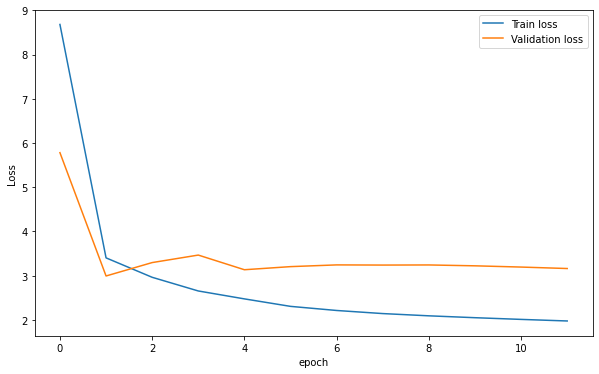

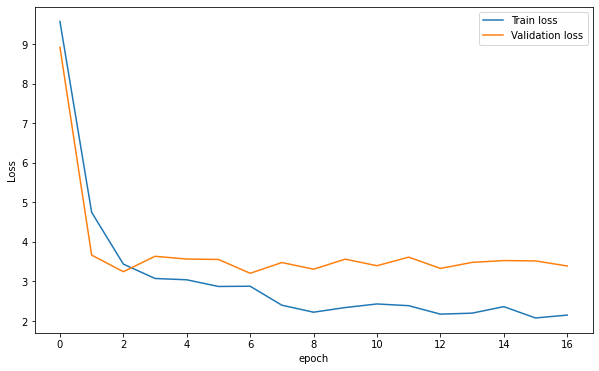

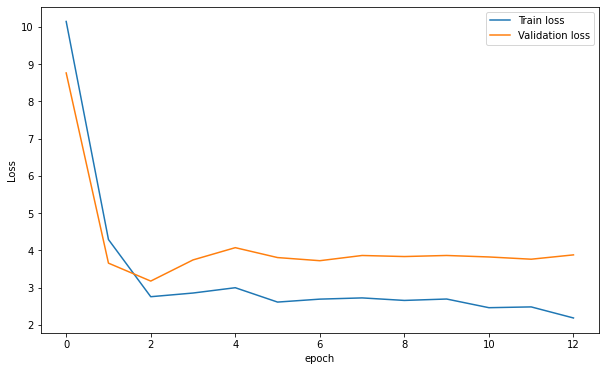

In [24]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

###**Testing the deep learning models**

In [25]:
dataset_X_test1 = dataset_X_test.values.reshape(40,9,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm = prediction_func(model_bilstm)
prediction_lstm = prediction_func(model_lstm)
prediction_gru = prediction_func(model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm.round(), dataset_y_test))
print(classification_report(prediction_bilstm.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_bilstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm.round(), dataset_y_test))
print(classification_report(prediction_lstm.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_lstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru.round(), dataset_y_test))
print(classification_report(prediction_gru.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_gru.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru.round(), dataset_y_test,average='macro'))


Accuracy :  0.2
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.27      0.36        15
         3.0       0.25      0.09      0.13        11
         4.0       0.00      0.00      0.00         5
         5.0       0.12      0.14      0.13         7
         6.0       0.29      1.00      0.44         2

    accuracy                           0.20        40
   macro avg       0.21      0.25      0.18        40
weighted avg       0.32      0.20      0.22        40

Accuracy :  0.225
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.71      0.31      0.43        16
         3.0       0.25      0.08      0.12        12
         4.0       0.00      0.00      0.00         3
         5.0       0.12      0.14      0.13         7
         6.0       0.29      1.00      0.44         2

    accuracy                           0.23

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**AFTER HYPERPARAMETER TUNING**

###**Creating models**

In [26]:
# Create BiLSTM model
def create_best_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model
# Create LSTM or GRU model
def create_best_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model

# BiLSTM
best_model_bilstm = create_best_model_bilstm(32)
# GRU and LSTM
best_model_gru = create_best_model(32, GRU)
best_model_lstm = create_best_model(32, LSTM)

##**Hyperparameter Tuning - 1 : Best Epoch Value**

In [27]:
def best_ep_fit_model(model,ep):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = ep,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks=[early_stop])
    return history


###**Training models for range of epoch values and measure Mean Square Error(mse) score**

In [28]:
epochs_range= [500,1000,2000,5000,7000]
mse_dict_bilstm1 = {}
mse_dict_lstm1 = {}
mse_dict_gru1 = {}
for i in epochs_range:
  history_bilstm1 = best_ep_fit_model(best_model_bilstm,i)
  mse_dict_bilstm1[i]=history_bilstm1.history['mse']
  history_lstm1 = best_ep_fit_model(best_model_lstm,i)
  mse_dict_lstm1[i]=history_lstm1.history['mse']
  history_gru1 = best_ep_fit_model(best_model_gru,i)
  mse_dict_gru1[i]=history_gru1.history['mse']

Epoch 1/500
13/13 [==============================] - 9s 137ms/step - loss: 8.8336 - mse: 8.8336 - val_loss: 6.3151 - val_mse: 6.3151
Epoch 2/500
13/13 [==============================] - 0s 15ms/step - loss: 3.5005 - mse: 3.5005 - val_loss: 2.9886 - val_mse: 2.9886
Epoch 3/500
13/13 [==============================] - 0s 15ms/step - loss: 2.9597 - mse: 2.9597 - val_loss: 3.2004 - val_mse: 3.2004
Epoch 4/500
13/13 [==============================] - 0s 15ms/step - loss: 2.6159 - mse: 2.6159 - val_loss: 3.4259 - val_mse: 3.4259
Epoch 5/500
13/13 [==============================] - 0s 16ms/step - loss: 2.4209 - mse: 2.4209 - val_loss: 3.0897 - val_mse: 3.0897
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 2.2321 - mse: 2.2321 - val_loss: 3.2203 - val_mse: 3.2203
Epoch 7/500
13/13 [==============================] - 0s 15ms/step - loss: 2.1499 - mse: 2.1499 - val_loss: 3.2744 - val_mse: 3.2744
Epoch 8/500
13/13 [==============================] - 0s 16ms/step - loss: 2

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [29]:
mse_dict_bilstm1

{500: [8.83362102508545,
  3.500454902648926,
  2.9597439765930176,
  2.615908145904541,
  2.4209482669830322,
  2.232065439224243,
  2.149890899658203,
  2.090980052947998,
  2.047978639602661,
  2.0110270977020264,
  1.9792312383651733,
  1.9512999057769775],
 1000: [1.9242421388626099,
  1.8975658416748047,
  1.872523546218872,
  1.8491125106811523,
  1.8280922174453735,
  1.8085477352142334,
  1.7906644344329834,
  1.7743196487426758,
  1.7593735456466675,
  1.7463854551315308,
  1.7344696521759033,
  1.7237564325332642,
  1.7138593196868896,
  1.7045046091079712,
  1.6956782341003418,
  1.6871298551559448,
  1.6788084506988525,
  1.6712676286697388,
  1.6632061004638672,
  1.6554679870605469,
  1.6481047868728638,
  1.6409283876419067,
  1.6328858137130737,
  1.6278681755065918,
  1.617771029472351,
  1.607598900794983,
  1.6007964611053467,
  1.5927163362503052,
  1.5821932554244995,
  1.5725326538085938,
  1.5633742809295654,
  1.553041934967041,
  1.5422836542129517,
  1.531844

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [30]:
for i in epochs_range:
  mse_dict_bilstm1[i] = mse_dict_bilstm1[i][-10:]
  mse_dict_lstm1[i] = mse_dict_lstm1[i][-10:]
  mse_dict_gru1[i] = mse_dict_gru1[i][-10:]

###**Bilstm**

In [31]:
mse_epochs_bilstm1 = pd.DataFrame.from_dict(mse_dict_bilstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_bilstm1

,500,1000,2000,5000,7000
mean,2.245907,0.802437,0.720599,0.422669,0.341106
std,0.327069,0.048422,0.146692,0.031383,0.040829
min,1.951300,0.724708,0.635298,0.377176,0.298451
25%,2.020265,0.772274,0.643229,0.403045,0.311832
50%,2.120435,0.802378,0.655695,0.412506,0.327643
75%,2.373728,0.834236,0.681600,0.445085,0.362783
max,2.959744,0.877129,1.064524,0.471025,0.427299


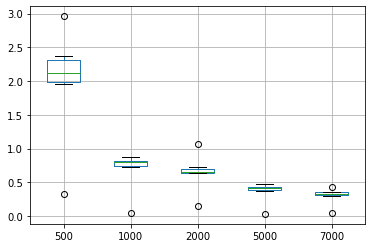

In [32]:
boxplot_11 = mse_epochs_bilstm1.boxplot(column=[500,1000,2000,5000,7000])

###**Lstm**

In [33]:
mse_epochs_lstm1 = pd.DataFrame.from_dict(mse_dict_lstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_lstm1

,500,1000,2000,5000,7000
mean,2.428455,1.708064,1.603362,1.483513,1.353065
std,0.211959,0.131080,0.108985,0.082460,0.075573
min,2.157101,1.545749,1.477632,1.383803,1.189652
25%,2.274969,1.618465,1.510031,1.423770,1.326100
50%,2.393400,1.681542,1.593378,1.468121,1.373831
75%,2.581753,1.753664,1.642058,1.535177,1.398305
max,2.812063,1.955522,1.792278,1.637341,1.448405


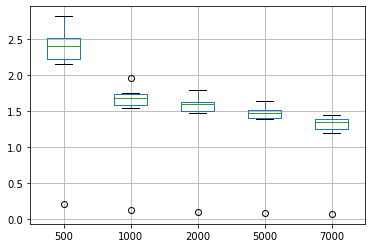

In [34]:
boxplot_12 = mse_epochs_lstm1.boxplot(column=[500,1000,2000,5000,7000])

###**GRU**

In [35]:
mse_epochs_gru1 = pd.DataFrame.from_dict(mse_dict_gru1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_gru1

,500,1000,2000,5000,7000
mean,2.592592,1.595440,1.483364,1.358240,1.235801
std,0.207964,0.069800,0.068809,0.085596,0.079377
min,2.404353,1.462186,1.363272,1.189592,1.142930
25%,2.454399,1.590401,1.428970,1.327887,1.157602
50%,2.489033,1.606738,1.499221,1.347318,1.234394
75%,2.664504,1.650275,1.528490,1.380374,1.295277
max,2.960746,1.662392,1.583004,1.496376,1.362025


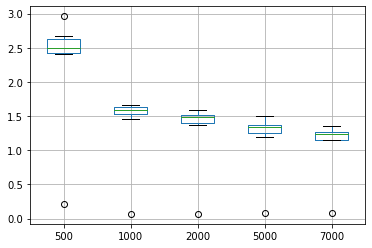

In [36]:
boxplot_13 = mse_epochs_gru1.boxplot(column=[500,1000,2000,5000,7000])

##**Hyperparameter Tuning - 2 : Best Batch Size**

In [37]:
def best_bs_fit_model(model,bs):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = bs, 
                        shuffle = False, callbacks=[early_stop])
    return history

###**Training models for range of batch size values and measure Mean Square Error(mse) score**

In [38]:
batch_range = [4,5,8,10,20]
mse_dict_bilstm2 = {}
mse_dict_lstm2 = {}
mse_dict_gru2 = {}
for i in batch_range:
  history_bilstm2 = best_bs_fit_model(best_model_bilstm,i)
  mse_dict_bilstm2[i]=history_bilstm2.history['mse']
  history_lstm2 = best_bs_fit_model(best_model_lstm,i)
  mse_dict_lstm2[i]=history_lstm2.history['mse']
  history_gru2 = best_bs_fit_model(best_model_gru,i)
  mse_dict_gru2[i]=history_gru2.history['mse']


Epoch 1/7000
32/32 [==============================] - 5s 59ms/step - loss: 0.6920 - mse: 0.6920 - val_loss: 5.7115 - val_mse: 5.7115
Epoch 2/7000
32/32 [==============================] - 0s 14ms/step - loss: 1.8219 - mse: 1.8219 - val_loss: 4.3016 - val_mse: 4.3016
Epoch 3/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.5189 - mse: 1.5189 - val_loss: 3.1323 - val_mse: 3.1323
Epoch 4/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1396 - mse: 1.1396 - val_loss: 3.5011 - val_mse: 3.5011
Epoch 5/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.0905 - mse: 1.0905 - val_loss: 3.5395 - val_mse: 3.5395
Epoch 6/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1870 - mse: 1.1870 - val_loss: 4.2251 - val_mse: 4.2251
Epoch 7/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1952 - mse: 1.1952 - val_loss: 3.7804 - val_mse: 3.7804
Epoch 8/7000
32/32 [==============================] - 0s 13ms/step - 

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [39]:
mse_dict_bilstm2

{4: [0.6920452117919922,
  1.8219410181045532,
  1.518943428993225,
  1.139591097831726,
  1.0905406475067139,
  1.186981439590454,
  1.1951663494110107,
  0.9845384359359741,
  0.811689019203186,
  0.782903254032135,
  0.7245441675186157,
  0.7130577564239502,
  0.7316053509712219,
  0.6708874702453613,
  0.8479341864585876,
  0.7677177786827087,
  0.5858465433120728,
  0.5567428469657898,
  0.5080592036247253,
  0.46903708577156067,
  0.4800022840499878,
  0.45824092626571655,
  0.42310890555381775],
 5: [0.3850694000720978,
  0.46755310893058777,
  0.38741543889045715,
  0.34424886107444763,
  0.32020583748817444,
  0.3152814209461212,
  0.2838222086429596,
  0.3622763156890869,
  0.32880592346191406,
  0.33686691522598267,
  0.28197136521339417,
  0.26273107528686523,
  0.25041669607162476,
  0.23988616466522217,
  0.22919444739818573,
  0.21512146294116974,
  0.2073458880186081,
  0.19547182321548462,
  0.1894233375787735],
 8: [0.1751372218132019,
  0.16797763109207153,
  0.16973

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [40]:
for i in batch_range:
  mse_dict_bilstm2[i] = mse_dict_bilstm2[i][-10:]
  mse_dict_lstm2[i] = mse_dict_lstm2[i][-10:]
  mse_dict_gru2[i] = mse_dict_gru2[i][-10:]

###**Bilstm**

In [41]:
mse_batch_bilstm2 = pd.DataFrame.from_dict(mse_dict_bilstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_bilstm2

,4,5,8,10,20
mean,0.576758,0.240843,0.151805,0.117923,0.097781
std,0.142472,0.044852,0.010824,0.005899,0.003144
min,0.423109,0.189423,0.139406,0.109203,0.092798
25%,0.471778,0.209290,0.143582,0.112949,0.095585
50%,0.532401,0.234540,0.150055,0.117775,0.098052
75%,0.649627,0.259652,0.156441,0.122255,0.100243
max,0.847934,0.336867,0.169732,0.126587,0.101957


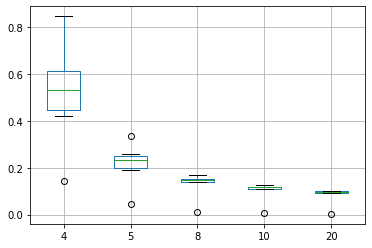

In [42]:
boxplot_21 = mse_batch_bilstm2.boxplot(column=[4,5,8,10,20])

###**Lstm**

In [43]:
mse_batch_lstm2 = pd.DataFrame.from_dict(mse_dict_lstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_lstm2

,4,5,8,10,20
mean,1.577861,1.139627,0.760913,0.724491,0.689740
std,0.180543,0.096070,0.027878,0.025425,0.049712
min,1.290105,1.026721,0.727499,0.681750,0.622625
25%,1.483880,1.062312,0.733713,0.709502,0.666457
50%,1.531920,1.146428,0.766744,0.723964,0.675516
75%,1.671511,1.166806,0.772587,0.739517,0.705506
max,1.876688,1.354174,0.810965,0.765406,0.803754


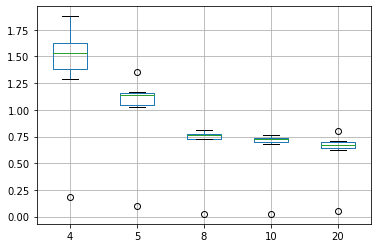

In [44]:
boxplot_22 = mse_batch_lstm2.boxplot(column=[4,5,8,10,20])

###**GRU**

In [45]:
mse_batch_gru2 = pd.DataFrame.from_dict(mse_dict_gru2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_gru2

,4,5,8,10,20
mean,1.177614,0.961625,0.825008,0.764731,0.699582
std,0.034225,0.053497,0.082388,0.072060,0.028774
min,1.120865,0.884468,0.668505,0.692586,0.663671
25%,1.155172,0.934358,0.763527,0.700401,0.679898
50%,1.178139,0.962240,0.856558,0.751943,0.697372
75%,1.200275,0.980946,0.881647,0.808776,0.716166
max,1.236037,1.063386,0.931035,0.897862,0.758645


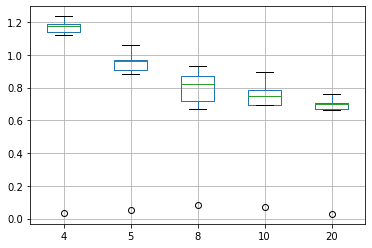

In [46]:
boxplot_23 = mse_batch_gru2.boxplot(column=[4,5,8,10,20])

##**Training the Models**

In [47]:
def best_fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = 20, 
                        shuffle = False, callbacks=[early_stop])
    return history

In [48]:
history_bilstm_best = best_fit_model(best_model_bilstm)

Epoch 1/7000
7/7 [==============================] - 0s 24ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 3.6823 - val_mse: 3.6823
Epoch 2/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0904 - mse: 0.0904 - val_loss: 3.6324 - val_mse: 3.6324
Epoch 3/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 3.7046 - val_mse: 3.7046
Epoch 4/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 3.6101 - val_mse: 3.6101
Epoch 5/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 3.7496 - val_mse: 3.7496
Epoch 6/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 3.5808 - val_mse: 3.5808
Epoch 7/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 3.7883 - val_mse: 3.7883
Epoch 8/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.0878 - m

In [49]:
history_lstm_best = best_fit_model(best_model_lstm)

Epoch 1/7000
7/7 [==============================] - 0s 20ms/step - loss: 0.6737 - mse: 0.6737 - val_loss: 2.0677 - val_mse: 2.0677
Epoch 2/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.6572 - mse: 0.6572 - val_loss: 2.1057 - val_mse: 2.1057
Epoch 3/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 2.1359 - val_mse: 2.1359
Epoch 4/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.6476 - mse: 0.6476 - val_loss: 2.0737 - val_mse: 2.0737
Epoch 5/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6385 - mse: 0.6385 - val_loss: 2.1542 - val_mse: 2.1542
Epoch 6/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6690 - mse: 0.6690 - val_loss: 2.1195 - val_mse: 2.1195
Epoch 7/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6952 - mse: 0.6952 - val_loss: 2.1778 - val_mse: 2.1778
Epoch 8/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6487 - m

In [50]:
history_gru_best = best_fit_model(best_model_gru)

Epoch 1/7000
7/7 [==============================] - 0s 16ms/step - loss: 0.6452 - mse: 0.6452 - val_loss: 2.5606 - val_mse: 2.5606
Epoch 2/7000
7/7 [==============================] - 0s 10ms/step - loss: 0.7319 - mse: 0.7319 - val_loss: 2.5542 - val_mse: 2.5542
Epoch 3/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5651 - mse: 0.5651 - val_loss: 2.5757 - val_mse: 2.5757
Epoch 4/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6575 - mse: 0.6575 - val_loss: 2.5983 - val_mse: 2.5983
Epoch 5/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.7264 - mse: 0.7264 - val_loss: 2.6064 - val_mse: 2.6064
Epoch 6/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.7562 - mse: 0.7562 - val_loss: 2.5535 - val_mse: 2.5535
Epoch 7/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.7772 - mse: 0.7772 - val_loss: 2.6461 - val_mse: 2.6461
Epoch 8/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6066 - m

##**Plotting train loss and validation loss graph**

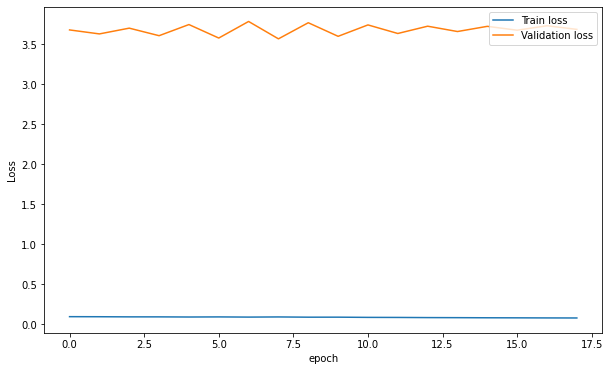

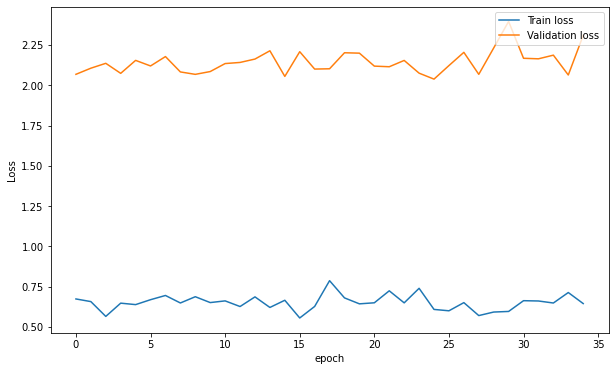

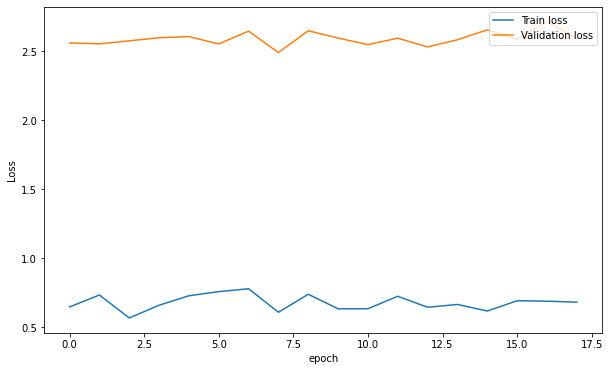

In [51]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm_best)
plot_loss (history_lstm_best)
plot_loss (history_gru_best)

##**Testing the models**

In [52]:
dataset_X_test1 = dataset_X_test.values.reshape(40,9,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def best_prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm_best = best_prediction_func(best_model_bilstm)
prediction_lstm_best = best_prediction_func(best_model_lstm)
prediction_gru_best = best_prediction_func(best_model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
print(classification_report(prediction_bilstm_best.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm_best.round(), dataset_y_test))
print(classification_report(prediction_lstm_best.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_lstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru_best.round(), dataset_y_test))
print(classification_report(prediction_gru_best.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_gru_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru_best.round(), dataset_y_test,average='macro'))

Accuracy :  0.25
              precision    recall  f1-score   support

         1.0       0.08      0.12      0.10         8
         2.0       0.29      0.22      0.25         9
         3.0       0.75      0.43      0.55         7
         4.0       0.00      0.00      0.00         3
         5.0       0.12      0.20      0.15         5
         6.0       0.43      0.60      0.50         5
         7.0       0.00      0.00      0.00         3

    accuracy                           0.25        40
   macro avg       0.24      0.23      0.22        40
weighted avg       0.28      0.25      0.25        40

Accuracy :  0.4
              precision    recall  f1-score   support

         1.0       0.33      0.40      0.36        10
         2.0       0.43      0.30      0.35        10
         3.0       0.25      0.20      0.22         5
         4.0       0.50      1.00      0.67         1
         5.0       0.50      0.57      0.53         7
         6.0       0.43      0.43      0.43  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Scores Evaluation**

In [53]:
scores = pd.DataFrame (Classifier,columns=['Classifier'])
scores['Type'] = Type
scores['Hyperparameter_Tuning'] = hyper
scores['Accuracy'] = Accuracy
scores['Recall'] = Recall
scores['Precision'] = Precision
scores['F1_score'] = F1_score

In [54]:
scores

,Classifier,Type,Hyperparameter_Tuning,Accuracy,Recall,Precision,F1_score
0,SVM,ML,No,0.350,0.224206,0.155556,0.164815
1,LR,ML,No,0.250,0.243056,0.155754,0.153047
2,RF,ML,No,0.475,0.423611,0.496573,0.391667
3,SVM,ML,Yes,0.250,0.235119,0.209967,0.212749
4,LR,ML,Yes,0.350,0.272817,0.246429,0.253543
5,RF,ML,Yes,0.450,0.399802,0.315028,0.345658
6,BILSTM,DL,No,0.200,0.250072,0.205357,0.179125
7,LSTM,DL,No,0.225,0.256448,0.229167,0.189593
8,GRU,DL,No,0.125,0.072344,0.196429,0.104264
9,BILSTM,DL,Yes,0.250,0.225113,0.238946,0.221329


##**Comparision of Machine Learning models before and after hyperparameter tuning**

In [55]:
ml_scores = scores.loc[scores['Type']=="ML"]

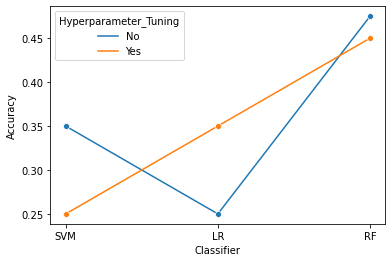

In [56]:
import seaborn as sns
sns.lineplot(x='Classifier',y='Accuracy',data=ml_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Deep Learning models before and after hyperparameter tuning**

In [57]:
dl_scores= scores.loc[scores['Type']=="DL"]

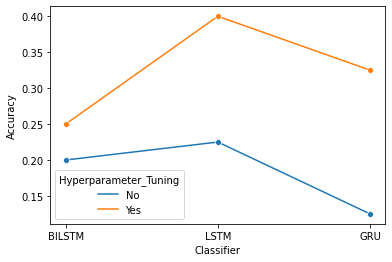

In [58]:
sns.lineplot(x='Classifier',y='Accuracy',data=dl_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Machine Learning and Deep Learning models after hyperparameter tuning as performance was better only after hyperparameter tuning**

In [59]:
com_scores = scores.loc[scores['Hyperparameter_Tuning']=="Yes"]

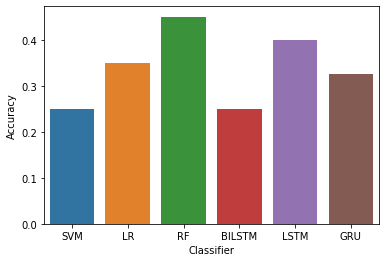

In [60]:
sns.barplot(x='Classifier',y='Accuracy',data=com_scores)

In [61]:
scores.to_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Results/M2(a.1).csv",index=False)